In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

**This problem involves the Boston data set, which we saw in the lab
for this chapter. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.
(a) For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.**

In [2]:
Boston = pd.read_csv("data/Boston.csv")
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
def simple_linear_all_from_one_data(data,y_name):
    stats_dict = {'Intercept param':[],'β1 param':[],'Intercept pvalue':[],'β1 pvalue':[],'rsquared':[],'rse':[],'rse/mpg_avrage':[]}
    stats_index = []
    for column_name in data.columns:
        if column_name != y_name:
            result_smf = smf.ols('{} ~ {}'.format(y_name,column_name),Boston).fit()
            stats_dict['Intercept param'].append(result_smf.params[0])
            stats_dict['β1 param'].append(result_smf.params[1])
            stats_dict['Intercept pvalue'].append(result_smf.pvalues[0])
            stats_dict['β1 pvalue'].append(result_smf.pvalues[1])
            stats_dict['rsquared'].append(result_smf.rsquared)
            stats_dict['rse'].append(result_smf.mse_resid ** 0.5)
            stats_dict['rse/mpg_avrage'].append(result_smf.mse_resid ** 0.5/data[y_name].mean())
            stats_index.append(column_name)
    stats_data = pd.DataFrame(stats_dict,index = stats_index)
    return stats_data
stats_data = simple_linear_all_from_one_data(Boston,'crim')
stats_data

,Intercept param,β1 param,Intercept pvalue,β1 pvalue,rsquared,rse,rse/mpg_avrage
zn,4.453694,-0.073935,4.037668e-24,5.506472e-06,0.040188,8.435290,2.334367
indus,-2.063743,0.509776,2.091266e-03,1.450349e-21,0.165310,7.866281,2.176901
chas,3.744447,-1.892777,1.239505e-19,2.094345e-01,0.003124,8.596615,2.379012
nox,-13.719882,31.248531,5.076814e-15,3.751739e-23,0.177217,7.809972,2.161318
rm,20.481804,-2.684051,2.272000e-09,6.346703e-07,0.048069,8.400586,2.324763
age,-3.777906,0.107786,7.221718e-05,2.854869e-16,0.124421,8.056649,2.229583
dis,9.499262,-1.550902,1.502748e-33,8.519949e-19,0.144149,7.965369,2.204322
rad,-2.287159,0.617911,3.605846e-07,2.693844e-56,0.391257,6.717752,1.859059
tax,-8.528369,0.029742,2.773600e-23,2.357127e-47,0.339614,6.996901,1.936310
ptratio,-17.646933,1.151983,3.395255e-08,2.942922e-11,0.084068,8.240212,2.280382


从以上表格可见，除去chas均可以拒绝零假设情况，其中rad、tax、lstat模型rsquared最大，解释性最好。

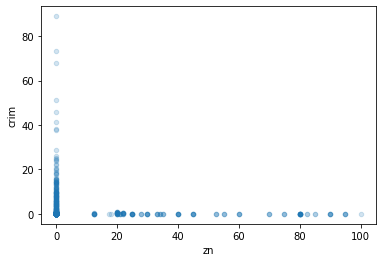

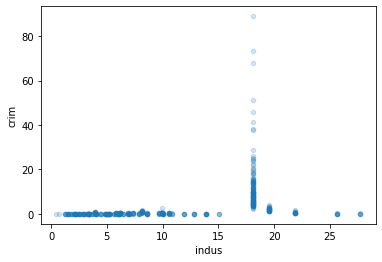

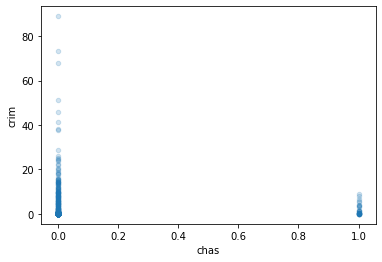

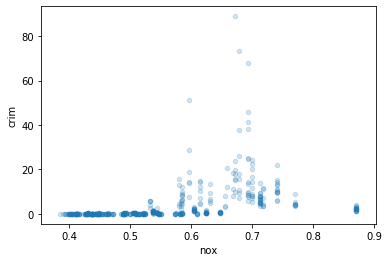

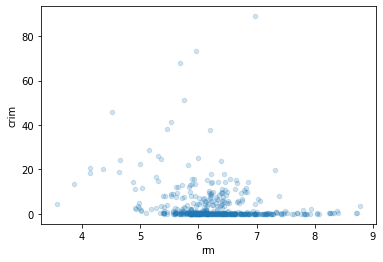

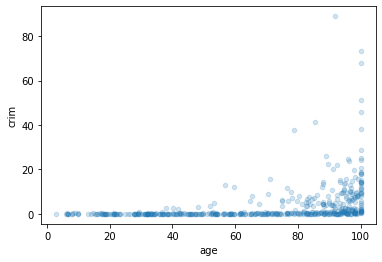

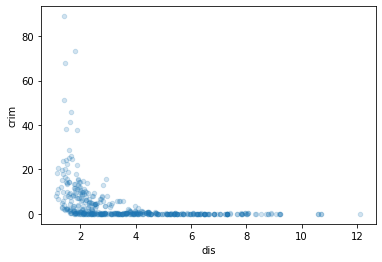

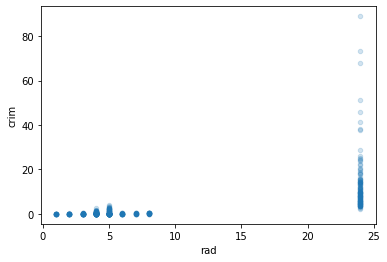

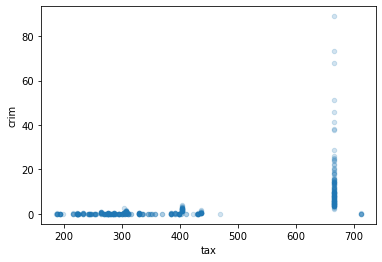

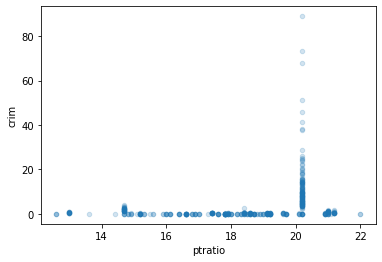

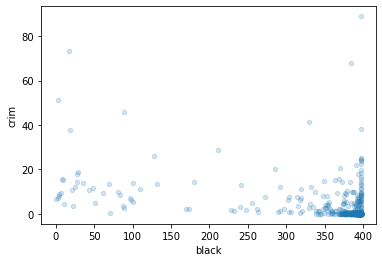

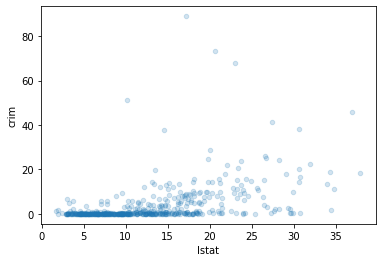

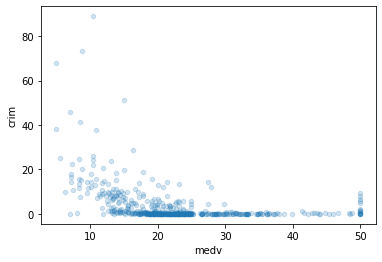

In [4]:
for column_num in range(1,len(Boston.columns)):
    Boston.plot(kind="scatter", x=Boston.columns[column_num], y= "crim",alpha=0.2)

比较散点图chas无关线性，rad、tax、lstat模型相关较明显。

**(b) Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis H 0 : β j = 0?**

In [5]:
#statsmodels实现（从现在开始全部使用更简洁smf表达）
columns_value = '1'
for column_value in Boston.columns:
    columns_value = columns_value + '+' + column_value
results_all = smf.ols('crim ~ {} - crim '.format(columns_value),data = Boston).fit()
results_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.57e-56
Time:                        11:21:06   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019       2.818      31.248
zn             0.0449      0.019      2.394      0.017       0.008       0.082
indus         -0.0639      0.083     -0.766      0.444      -0.228       0.100
chas          -0.7491      1.180     -0.635      0.526      -3.068       1.570
nox          -10.3135      5.276     -1.955      0.051     -20.679       0.052
rm             0.4301      0.613      0.702      0.483      -0.774       1.634
age            0.0015      0.018      0.081      0.935      -0.034       0.037
dis           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
rad            0.5882      0.088      6.680      0.000       0.415       0.761
tax           -0.0038      0.005     -0.733      0.464      -0.014       0.006
ptratio       -0.2711      0.186     -1.454      0.147      -0.637       0.095
black         -0.0075      0.004     -2.052      0.041      -0.015      -0.000
lstat          0.1262      0.076      1.667      0.096      -0.023       0.275
medv          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

zn、dis、rad、black、medv（p值<0.05）

**(c) How do your results from (a) compare to your results from (b)?
Create a plot displaying the univariate regression coefficients
from (a) on the x-axis, and the multiple regression coefficients
from (b) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regres-
sion model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.**

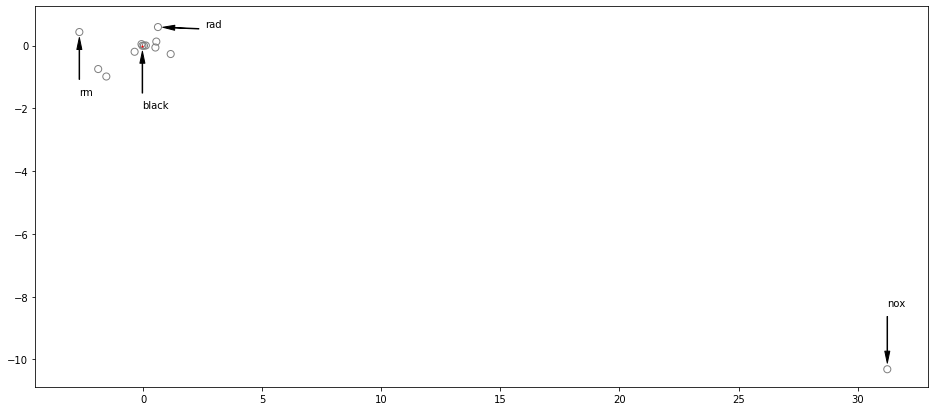

In [6]:
plt.figure(figsize=(16, 7))
for column_name in Boston.columns:
    if column_name != 'crim':
        plt.scatter(stats_data['β1 param'][column_name],results_all.params[column_name],color='', marker='o', edgecolors='gray', s=50)
        #plt.text(stats_data['β1 param'][column_name],results_all.params[column_name],column_name,fontsize=12, color="black")
        if stats_data['β1 param'][column_name] == stats_data['β1 param'].min():
            plt.annotate(column_name, xy=(stats_data['β1 param'][column_name],results_all.params[column_name]), 
                     xytext=(stats_data['β1 param'][column_name],results_all.params[column_name] - 2),
                    arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
        elif stats_data['β1 param'][column_name] == stats_data['β1 param'].max():
             plt.annotate(column_name, xy=(stats_data['β1 param'][column_name],results_all.params[column_name]), 
                     xytext=(stats_data['β1 param'][column_name],results_all.params[column_name] + 2),
                    arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
        elif results_all.params[column_name] == results_all.params.drop('Intercept').max():
            plt.annotate(column_name, xy=(stats_data['β1 param'][column_name],results_all.params[column_name]), 
                     xytext=(stats_data['β1 param'][column_name] + 2,results_all.params[column_name]),
                    arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
        elif (abs(stats_data['β1 param'][column_name] - results_all.params[column_name]) ==
              np.abs(stats_data['β1 param'] - results_all.params.drop('Intercept')).min()):
            plt.annotate(column_name, xy=(stats_data['β1 param'][column_name],results_all.params[column_name]), 
                     xytext=(stats_data['β1 param'][column_name],results_all.params[column_name] - 2),
                    arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
            plt.scatter(stats_data['β1 param'][column_name],results_all.params[column_name],color='r',marker='o', s=1)

In [7]:
pd.DataFrame({'sigle params':stats_data['β1 param'],
              'multiple params':results_all.params.drop("Intercept"),
              'variation value':stats_data['β1 param'] - results_all.params.drop("Intercept")}).sort_values('variation value')

,sigle params,multiple params,variation value
rm,-2.684051,0.430131,-3.114182
chas,-1.892777,-0.749134,-1.143643
dis,-1.550902,-0.987176,-0.563726
medv,-0.363160,-0.198887,-0.164273
zn,-0.073935,0.044855,-0.118790
black,-0.036280,-0.007538,-0.028742
rad,0.617911,0.588209,0.029702
tax,0.029742,-0.003780,0.033522
age,0.107786,0.001452,0.106335
lstat,0.548805,0.126211,0.422593


(a)/(b)结果差别较大，部分预测变量由正相关变为负相关（反之亦存在），特别是nox/rm变化较大，两个模型都可信的变量(zn、dis、rad、black、medv)中zn由负相关变为正相关

**(d) Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor X, fit a model of the form
Y = β 0 + β 1 X + β 2 X 2 + β 3 X 3 + ?.**

In [8]:
#在（simple linear）单个变量基础上分析
def simple_linear_all_from_one_data_poly3(data,y_name):
    stats_dict = {'Intercept param':[],'β1 param':[],'β2 param':[],'β3 param':[],
                  'Intercept pvalue':[],'β1 pvalue':[],'β2 pvalue':[],'β3 pvalue':[],
                  'rsquared':[],'rse':[],'rse/mpg_avrage':[]}
    stats_index = []
    for column_name in data.columns:
        if column_name != y_name:
            column_name_d3 = column_name
            for poly_num in range(2,4):
                column_name_d3 = column_name_d3 + '+ I({}**{})'.format(column_name,str(poly_num))
            result_smf = smf.ols('{} ~ {}'.format(y_name,column_name_d3),Boston).fit()
            stats_dict['Intercept param'].append(result_smf.params[0])
            stats_dict['β1 param'].append(result_smf.params[1])
            stats_dict['β2 param'].append(result_smf.params[2])
            stats_dict['β3 param'].append(result_smf.params[3])
            stats_dict['Intercept pvalue'].append(result_smf.pvalues[0])
            stats_dict['β1 pvalue'].append(result_smf.pvalues[1])
            stats_dict['β2 pvalue'].append(result_smf.pvalues[2])
            stats_dict['β3 pvalue'].append(result_smf.pvalues[3])
            stats_dict['rsquared'].append(result_smf.rsquared)
            stats_dict['rse'].append(result_smf.mse_resid ** 0.5)
            stats_dict['rse/mpg_avrage'].append(result_smf.mse_resid ** 0.5/data[y_name].mean())
            stats_index.append(column_name)
    stats_data = pd.DataFrame(stats_dict,index = stats_index)
    return stats_data
stats_data_poly3 = simple_linear_all_from_one_data_poly3(Boston,'crim')
stats_data_poly3

,Intercept param,β1 param,β2 param,β3 param,Intercept pvalue,β1 pvalue,β2 pvalue,β3 pvalue,rsquared,rse,rse/mpg_avrage
zn,4.846050,-3.321884e-01,6.482634e-03,-3.775793e-05,4.113000e-26,2.612296e-03,9.375050e-02,2.295386e-01,0.058242,8.372207,2.316910
indus,3.662568,-1.965213e+00,2.519373e-01,-6.976009e-03,2.036526e-02,5.297064e-05,3.420187e-10,1.196405e-12,0.259658,7.423121,2.054261
chas,3.744447,1.114140e+14,-5.609613e+13,-5.531784e+13,1.346359e-19,6.813326e-01,6.813326e-01,6.813326e-01,0.003121,8.605169,2.381379
nox,233.086591,-1.279371e+03,2.248544e+03,-1.245703e+03,1.311939e-11,2.758372e-13,6.811300e-15,6.961110e-16,0.296978,7.233605,2.001815
rm,112.624596,-3.915014e+01,4.550896e+00,-1.744770e-01,8.148335e-02,2.117564e-01,3.641094e-01,5.085751e-01,0.067786,8.329676,2.305139
age,-2.548763,2.736531e-01,-7.229596e-03,5.745307e-05,3.577971e-01,1.426608e-01,4.737733e-02,6.679915e-03,0.174231,7.839703,2.169545
dis,30.047612,-1.555435e+01,2.452072e+00,-1.185986e-01,1.633088e-30,6.374792e-18,4.941214e-12,1.088832e-08,0.277825,7.331479,2.028900
rad,-0.605545,5.127360e-01,-7.517736e-02,3.208996e-03,7.678317e-01,6.234175e-01,6.130099e-01,4.823138e-01,0.400037,6.682402,1.849276
tax,19.183581,-1.533096e-01,3.608266e-04,-2.203715e-07,1.045047e-01,1.097075e-01,1.374682e-01,2.438507e-01,0.368882,6.853707,1.896683
ptratio,477.184046,-8.236054e+01,4.635347e+00,-8.476032e-02,2.462124e-03,3.028663e-03,4.119552e-03,6.300514e-03,0.113782,8.121583,2.247552


从以上可以看出模型（zn、indus、nox、dis、ptratio、medv）具有非线性